In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a string
    return ' '.join(tokens)

In [5]:
# Load the dataset
# Assuming the dataset is a CSV file with columns: 'video_title', 'video_description', 'video_type'
df = pd.read_csv('/content/Collected_data_raw.csv')
print(df.columns)
# Combine title and description for better feature representation
df['text'] = df['Title'] + ' ' + df['Description']


Index(['Unnamed: 0', 'Video Id', 'Title', 'Description', 'Category'], dtype='object')


In [6]:
# Preprocess the text
df['text'] = df['text'].astype(str)
df['processed_text'] = df['text'].apply(preprocess_text)

# Split the data into features (X) and target (y)
X = df['processed_text']
y = df['Category']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Accuracy: 0.9071117561683599

Classification Report Naive Bayes:
                        precision    recall  f1-score   support

         art and music       0.88      0.92      0.90       347
                  food       0.95      0.92      0.93       340
               history       0.84      0.89      0.86       350
         manufacturing       0.96      0.94      0.95       340
science and technology       0.87      0.86      0.87       326
                travel       0.95      0.92      0.94       364

              accuracy                           0.91      2067
             macro avg       0.91      0.91      0.91      2067
          weighted avg       0.91      0.91      0.91      2067



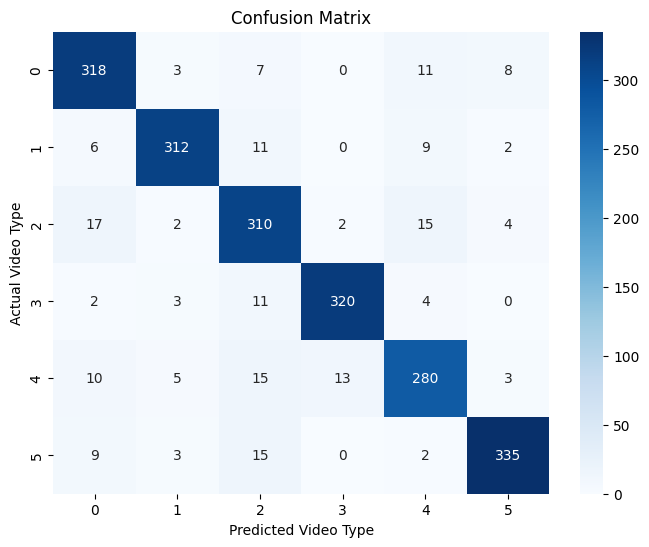

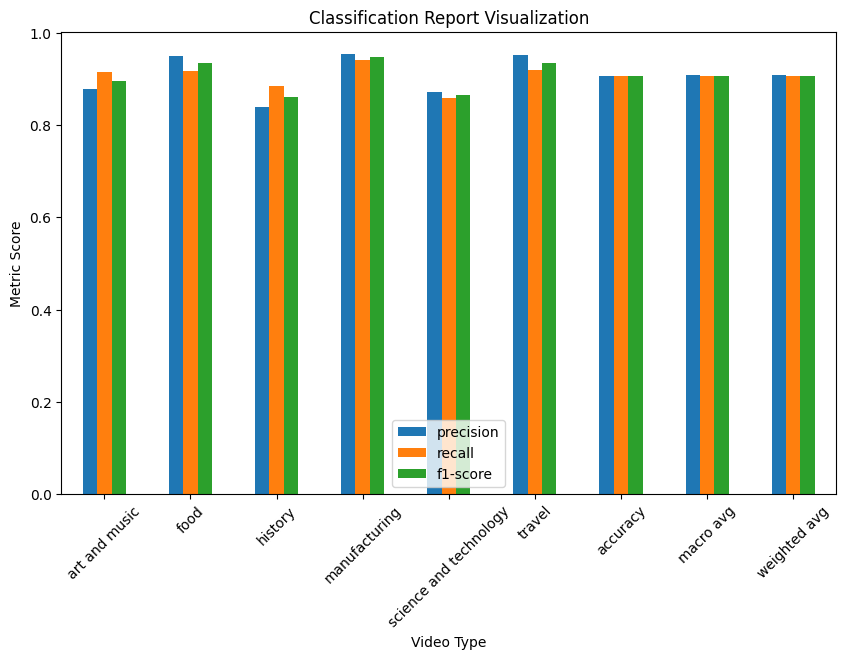

In [12]:

from sklearn.metrics import confusion_matrix, classification_report

# Train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report Naive Bayes:")
print(classification_report(y_test, y_pred))

# Function to predict video type for new data
def predict_video_type(title, description):
    text = title + ' ' + description
    processed_text = preprocess_text(text)
    tfidf_vector = tfidf_vectorizer.transform([processed_text])
    prediction = clf.predict(tfidf_vector)
    return prediction[0]

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Video Type')
plt.ylabel('Actual Video Type')
plt.show()

# Classification report visualization
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.drop('support', axis=1, inplace=True)  # Remove the 'support' row
df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Visualization')
plt.xticks(rotation=45)
plt.xlabel('Video Type')  # Update x-axis label
plt.ylabel('Metric Score')  # Update y-axis label
plt.show()

Accuracy: 0.9559748427672956

Classification Report SVM:
                        precision    recall  f1-score   support

         art and music       0.96      0.97      0.97       347
                  food       0.98      0.96      0.97       340
               history       0.86      0.96      0.91       350
         manufacturing       0.98      0.96      0.97       340
science and technology       0.96      0.94      0.95       326
                travel       1.00      0.95      0.97       364

              accuracy                           0.96      2067
             macro avg       0.96      0.96      0.96      2067
          weighted avg       0.96      0.96      0.96      2067



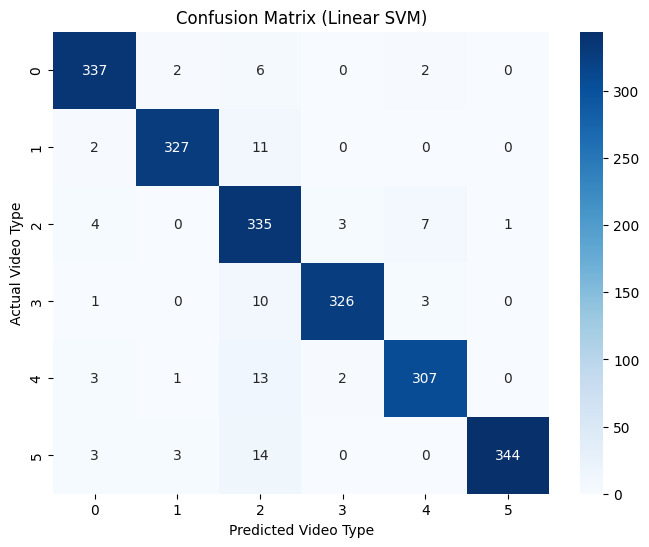

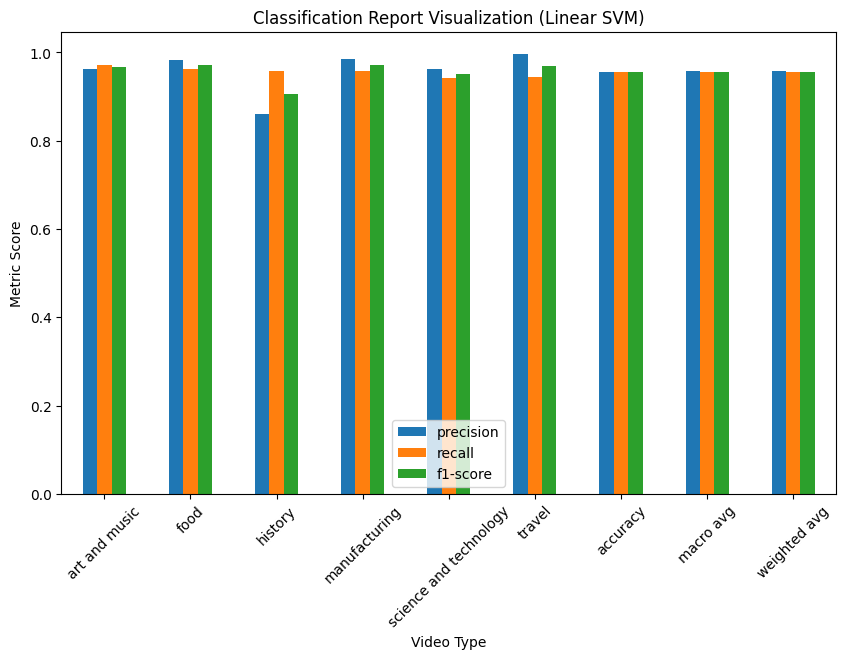

In [13]:



# Train the Linear SVM model
clf1 = SVC(kernel='linear', C=1.0)
clf1.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf1.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report SVM:")
print(classification_report(y_test, y_pred))

# Function to predict video type for new data
def predict_video_type(title, description):
    text = title + ' ' + description
    processed_text = preprocess_text(text)
    tfidf_vector = tfidf_vectorizer.transform([processed_text])
    prediction = clf1.predict(tfidf_vector)
    return prediction[0]

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Linear SVM)')
plt.xlabel('Predicted Video Type')
plt.ylabel('Actual Video Type')
plt.show()

# Classification report visualization
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.drop('support', axis=1, inplace=True)  # Remove the 'support' row
df.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Visualization (Linear SVM)')
plt.xticks(rotation=45)
plt.xlabel('Video Type')  # Update x-axis label
plt.ylabel('Metric Score')  # Update y-axis label
plt.show()

In [ ]:
#First Example
new_video_title = "Welcome to Peru! | Best Essential Tips &amp; Travel Guide"
new_video_description = "Welcome to Peru! This essential travel guide will show you the best essential tips for Peru, one of Latin America's incredible countries. From Lima to Cuzco and ..."
predicted_type = predict_video_type(new_video_title, new_video_description)
print(f"\nPredicted video type: {predicted_type}")


Predicted video type: travel


In [14]:
#second example
new_video_title = "Archeology - exploring the past with modern technology | DW History Documentary"
new_video_description = "Today modern archaeology often works with digital technology. Geophysics has allowed thousands of ancient sites to be located - a huge gain for science."
predicted_type = predict_video_type(new_video_title, new_video_description)
print(f"\nPredicted video type: {predicted_type}")


Predicted video type: history


In [15]:
#third example
new_video_title = "Home Cook vs. Food Stylist: Pasta Primavera | NYT Cooking"
new_video_description = "What does it take to cook for a professional food photograph? This is Home Cook vs. Food Stylist, where you see two different approaches to the same dish."
predicted_type = predict_video_type(new_video_title, new_video_description)
print(f"\nPredicted video type: {predicted_type}")


Predicted video type: food


In [17]:
#fourth example
new_video_title = "The UPSIDE DOWN FACES Art Challenge!"
new_video_description = "Mark's Video: https://www.youtube.com/watch?v=nQsLEQ8jmoo âž¨ Get my APP, Courses, eBooks, Brushes and more: http://www.jazzastudios.com/Shop.php ..."
predicted_type = predict_video_type(new_video_title, new_video_description)
print(f"\nPredicted video type: {predicted_type}")


Predicted video type: art and music


In [16]:
#fifth example
new_video_title = "Best Selling Motorhome Manufacturer Thor Motor Coach Plant Tour Diesel Motorhomes,Class A,Class C RV"
new_video_description = "Take a tour of the motorhome manufacturing process at the Best Selling Motorhome Manufacturer in North America, Thor Motor Coach. This plant tour shows ..."
predicted_type = predict_video_type(new_video_title, new_video_description)
print(f"\nPredicted video type: {predicted_type}")


Predicted video type: manufacturing


In [19]:
#sixth example
new_video_title = "My New Calamity STRIDER Outplays Everyone - War Robots Gameplay WR"
new_video_description = "War Robots Gameplay from my own WR Android Account with a new Calamity Spark Strider Outplaying Everyone on the Battlefield. My 2nd Gaming Channel: ..."
predicted_type = predict_video_type(new_video_title, new_video_description)
print(f"\nPredicted video type: {predicted_type}")


Predicted video type: science and technology
